###  https://pymoo.org/getting_started/part_2.html

In [107]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2, # X 变量数量
                         n_obj=2, # f 问题数
                         n_ieq_constr=1,# g 约束条件数量
                         xl=np.array([-2,-2]), # X 自变量下限
                         xu=np.array([2,2])# X 自变量上限
                         ) 

    def _evaluate(self, x, out, *args, **kwargs):
        
        y = x[0]**2*x[1]**2
#         def p1(x):
#             return np.cos(y)
        
#         def p2(x):
#             return np.sin(y)
            
        # 待求解函数 
        f1 =  np.cos(y)#100 * (x[0]**2 + x[1]**2) 
        f2 =  np.arctan(y)#(x[0]-1)**2 + x[1]**2
        # f3 = (abs(x[0])<0.3)+(abs(x[1])<0.5)

        # 约束条件会选择 <= 0 的选择
        # g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        # g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8
        # g3 = ((x[0]**2)<0.5)+((x[1]**2)>0.3)
        g3 = abs(1-(x[0]<0.1)) #+(abs(x[1])<0.3)

        out["F"] = [f1, f2] #待求解问题
        #out["G"] = [g1, g2,g3] #约束条件
        out["G"] = [g3] #约束条件


problem = MyProblem()

* 您之所以意识到这个框架，可能是因为存在您喜欢使用的算法。 pymoo 遵循面向对象的方法，因此，我们接下来必须定义一个算法对象。根据优化问题的不同，不同的算法在不同类型的问题上会表现得更好或更差。建议首先了解算法背后的直觉，然后选择最适合解决您的优化问题的算法。 pymoo 中可用的算法列表可在此处找到。

* 在我们的例子中，优化问题相当简单，但应该考虑有两个目标和两个约束的方面。因此，让我们选择著名的多目标算法[NSGA-II](../algorithms/moo/nsga2.ipynb)。对于大多数算法，您可以选择默认的超参数，也可以通过修改它们来创建您自己的算法版本。例如，对于这个相对简单的问题，我们选择人口规模为 40 (`pop_size=40`)，并且每代中只有 10 (`n_offsprings=10`)。这种实现是一种贪婪的变体，可以提高更简单优化问题的收敛性，而不会出现优化方面的重大困难，例如局部帕累托前沿的存在。此外，我们启用重复检查（“eliminate_duplicates=True”），确保交配产生的后代在设计空间值方面与自身和现有种群不同。

In [108]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling,IntegerRandomSampling,BinaryRandomSampling

algorithm = NSGA2(
    pop_size=90, # z种群数量
    n_offsprings=100, # 每代的数量
    sampling= FloatRandomSampling(), #抽样设置
     #交叉配对
    crossover=SBX(prob=0.9 #交叉配对概率
                  , eta=15), #配对效率
    #变异
    mutation=PM(prob=0.8 #编译概率
                ,eta=20),# 配对效率
    eliminate_duplicates=True
)

* 此外，需要定义终止标准来启动优化过程。定义终止的最常见方法是限制函数求值的总数或简单地限制算法的迭代次数。此外，一些算法已经实现了自己的算法，例如单纯形退化时的 Nelder-Mead 或使用供应商库的 CMA-ES。由于这个问题的简单性，我们使用了相当少量的 40 次迭代算法。

In [109]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 90)
# termination = get_termination("nsga2")

* 最后，我们problem用我们定义的algorithm和来解决termination。函数式接口使用minimize方法。默认情况下，minimize执行算法和终止对象的深层复制，以保证它们在函数调用期间不会被修改。这对于确保使用相同随机种子的重复函数调用最终得到相同的结果非常重要。当算法终止时，该minimize函数返回一个Result对象。

In [110]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       90 |     34 |  0.000000E+00 |  0.4555555556 |             - |             -
     2 |      190 |     87 |  0.000000E+00 |  0.000000E+00 |  0.0121778390 |             f
     3 |      290 |     90 |  0.000000E+00 |  0.000000E+00 |  0.0073289947 |             f
     4 |      390 |     90 |  0.000000E+00 |  0.000000E+00 |  0.0036086317 |             f
     5 |      490 |     90 |  0.000000E+00 |  0.000000E+00 |  0.0023273849 |             f
     6 |      590 |     90 |  0.000000E+00 |  0.000000E+00 |  0.0039569785 |             f
     7 |      690 |     90 |  0.000000E+00 |  0.000000E+00 |  0.0023012399 |             f
     8 |      790 |     90 |  0.000000E+00 |  0.000000E+00 |  0.0029659584 |             f
     9 |      890 |     90 |  0.000000E+00 |  0.000000E+00 |  0.0034960980 |             f
    10 |      990 |     90 |  0.000000E+00 |  0.000000E+00 |  0.0018858772 |             f

In [111]:
X

array([[ 3.72733189e-04,  4.83135109e-03],
       [-1.44453499e+00, -1.22704091e+00],
       [-1.62443626e+00, -8.15187093e-01],
       [-1.26578781e+00, -1.15179298e+00],
       [-1.93631264e+00,  7.69776532e-01],
       [-1.33741118e+00, -9.74512441e-01],
       [-1.92736526e+00, -7.34985346e-01],
       [-8.95507199e-01,  6.98633303e-01],
       [-1.95119166e+00,  7.16893124e-01],
       [-1.85854993e+00,  7.82284516e-01],
       [-1.37528632e+00, -5.07776858e-01],
       [-1.60450353e+00, -8.59548354e-01],
       [-1.31830144e+00, -5.79694574e-01],
       [-1.30026149e+00, -9.40205696e-01],
       [-1.32721053e+00, -1.07781740e+00],
       [-1.53699873e+00, -8.00942220e-01],
       [-1.40837081e+00, -7.93172616e-01],
       [-8.95507199e-01,  7.48176934e-01],
       [-1.38045878e+00, -1.16262671e+00],
       [-8.90357591e-01, -8.17398163e-01],
       [-1.34128716e+00, -1.16355358e+00],
       [-8.04650831e-01, -9.74512441e-01],
       [-1.40837081e+00, -6.95904861e-01],
       [-1.

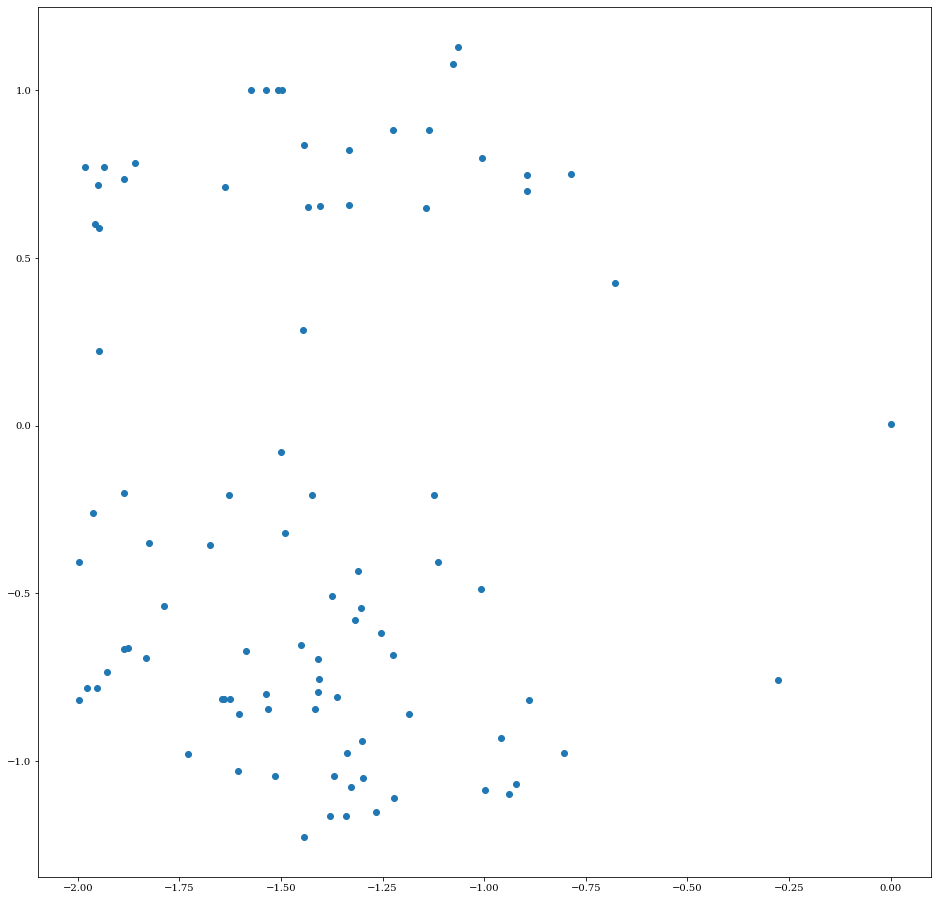

In [112]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,16))
plt.scatter(X[:,0],X[:,-1])
plt.savefig("NSGA2demo最优参数分布.png")

In [113]:
F.shape

(90, 2)

## 帕累托最优前沿

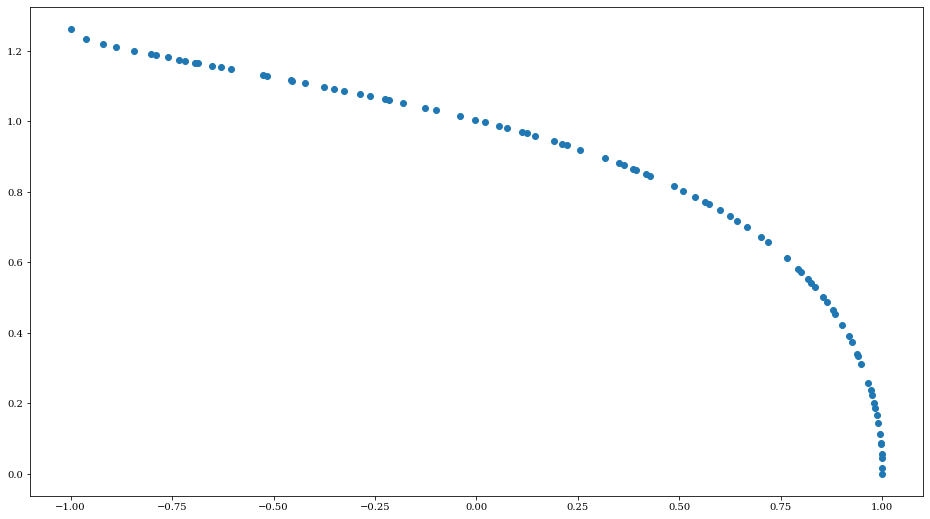

In [114]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,9))
plt.scatter(F[:,0],F[:,-1])
plt.savefig("NSGA2demo帕累托前沿.png")

In [115]:
import numpy as np
from pymoo.factory import get_algorithm,get_problem
from pymoo.optimize import minimize

#
class MyProblem:
    def __init__(self):
        self.n_var = 2
        

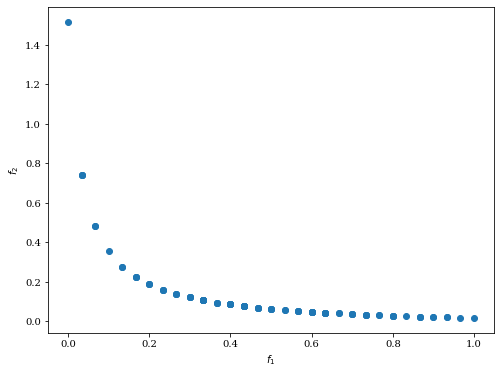

In [106]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt5")

algorithm = NSGA2(pop_size=100,
                  sampling=BinaryRandomSampling(),
                  crossover=TwoPointCrossover(),
                  mutation=BitflipMutation(),
                  eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)

Scatter().add(res.F).show()

### 实战用NSGA2给模型调参

In [116]:
#网上大部分例子都是和官方给出的差不多，我尝试使用该包来优化skearn中的逻辑回归模型，该例子比较简单
# 逻辑回归参数解释 https://www.jianshu.com/p/5e92abd6a3f0 
 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt




iris = load_iris()
xtrain,xtest,ytrain,ytest = train_test_split(iris['data'],iris['target'],test_size=0.5)



In [123]:


import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling,IntegerRandomSampling,BinaryRandomSampling
from pymoo.termination import get_termination
from pymoo.optimize import minimize    

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2, # X 变量数量
                         n_obj=2, # f 问题数
                         n_ieq_constr=1,# g 约束条件数量
                         xl=np.array([10,20]), # X 自变量下限
                         xu=np.array([100,60])# X 自变量上限
                         ) 

    def _evaluate(self, x, out, *args, **kwargs):
        clf = LogisticRegression(max_iter=int(x[0]) # 最大迭代次数
                                     , random_state=int(x[1]) 
                                     )
        clf.fit(xtrain,ytrain)
        probdict_y = clf.predict(xtest)
        # 待求解函数 
        f1 = -clf.score(xtest,ytest)
        f2 = -f1_score(ytest,probdict_y,average='macro')#,average='micro')
        
#         g1 = 1-int(type(x[1])==int)
        print(f"f1:{f1},f2:{f2},x[0]{x[0]},x[1]:{x[1]}")
        out["F"] = [f1, f2] #待求解问题
#         out["G"] = [g1] #约束条件
        

        #         f1 = np.cos(x[0]+x[1]) #100 * (x[0]**2 + x[1]**2) 
        #         f2 = np.sin(x[0]+x[1]) #(x[0]-1)**2 + x[1]**2

        #         # 约束条件会选择 <= 0 的选择
        #         g3 = x[0]-0.7 #+(abs(x[1])<0.3)

        #         out["F"] = [f1, f2] #待求解问题
        #         #out["G"] = [g1, g2,g3] #约束条件
        #         out["G"] = [g3] #约束条件


problem = MyProblem()


algorithm = NSGA2(
    pop_size=80, # z种群数量
    n_offsprings=10, # 每代的数量
    sampling= FloatRandomSampling(), #抽样设置
     #交叉配对
    crossover=SBX(prob=0.9 #交叉配对概率
                  , eta=15), #配对效率
    #变异
    mutation=PM(prob=0.8 #编译概率
                ,eta=20),# 配对效率
    eliminate_duplicates=True
)

termination = get_termination("n_gen", 20)

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F
# termination = get_termination("nsga2")
    

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]47.53198042323166,x[1]:48.81297973768632
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.01029373356104,x[1]:32.09330290527359
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]23.208030173540173,x[1]:23.69354379075191
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]26.76341902399038,x[1]:33.82242908172191
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]45.70907268076029,x[1]:41.552669360134274
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]47.72750629629653,x[1]:47.40878001587038
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]28.400702475836567,x[1]:55.124697455637815
f1:-0.96,f2:-0.960233918128655,x[0]12.464883387813355,x[1]:46.81870040713609
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]47.55743221304143,x[1]:42.34759313783007
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]22.634824473571037,x[1]:27.92405956339515


/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]82.0670111807983,x[1]:58.7304630287759
f1:-0.96,f2:-0.960233918128655,x[0]38.208176034331856,x[1]:47.69290462677256
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]88.87502370664345,x[1]:55.784266540153894
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]17.653979023280012,x[1]:21.562191329315294
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]25.2847377608112,x[1]:55.12570013717652
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]18.85121504497451,x[1]:36.844305000202084
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]96.21005771354517,x[1]:41.32661139892068
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]72.2689402555426,x[1]:32.62062524024252
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]71.78508349134253,x[1]:53.385026875894916
f1:-0.96,f2:-0.960233918128655,x[0]11.645944960977262,x[1]:50.005772597798696


/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]98.99749800158452,x[1]:49.926626175193576
f1:-0.96,f2:-0.960233918128655,x[0]35.239959285796466,x[1]:51.57117313805954
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]19.290340591987782,x[1]:37.91574104703621
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]91.7735952783786,x[1]:31.74456593494718
f1:-0.96,f2:-0.960233918128655,x[0]35.89978047277138,x[1]:25.201142884731105
f1:-0.96,f2:-0.960233918128655,x[0]11.743026208326736,x[1]:47.15342131759564
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]29.046530440005313,x[1]:30.62186637488905
f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]54.24158433523045,x[1]:22.134501804683214
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]61.67058449428118,x[1]:25.869142996232405
f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]63.03749832129558,x[1]:47.99033440083725
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]19.210098594504323,x[1]:36.56223951278273
f1:-0.9333333333333333,f2:-0.933723196

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]95.0135280391732,x[1]:43.46220162007972
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]91.30617237590951,x[1]:25.4989881658495
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]22.53487125256827,x[1]:52.29565154838095
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]45.79091532869802,x[1]:26.61416788467731
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.47577223564305,x[1]:33.91063438982026
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]77.573089282254,x[1]:49.03991941401806
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]89.49754820852289,x[1]:44.94688828222436
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]77.58481906246034,x[1]:33.9559336791137
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]34.29351025885235,x[1]:55.835448727842675
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]48.52820708841654,x[1]:58.59360188593542
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]69.70973480366033,x[1]:44.86782880836487
f1:-

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]50.49209201319465,x[1]:43.13558457548527
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]46.732312248515306,x[1]:29.48107920972111
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]91.30415685060284,x[1]:42.947179466891434
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.258329432804308,x[1]:44.68579654482895
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]39.398041159488656,x[1]:41.08232409030437
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]89.73478893796971,x[1]:34.29079040009999
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]91.76816358278192,x[1]:44.93440463167211
f1:-0.96,f2:-0.960233918128655,x[0]11.423911856190065,x[1]:57.17748934975045
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]72.18072257652315,x[1]:59.89291401805922
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]25.51064575107957,x[1]:25.48542998515511
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.93359167334472,x[1]:47.87272645959601
f1:-0.96,f

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear


f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]74.03722827656246,x[1]:24.970838478886588
f1:-0.96,f2:-0.960233918128655,x[0]11.789212045581603,x[1]:21.048439475108772
f1:-0.96,f2:-0.960233918128655,x[0]12.547583921871514,x[1]:29.848442704121837
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]87.40251538145992,x[1]:41.55324257366611
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]59.75397808171893,x[1]:53.68123569438423
f1:-0.8933333333333333,f2:-0.8953846153846153,x[0]21.175598360792,x[1]:31.16734716044558
f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]62.71833443124591,x[1]:58.78382993278698
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]60.49271973301389,x[1]:20.74589157491772
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]82.05694054125547,x[1]:29.318970953640818


/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]82.63946760569013,x[1]:35.51442576256687
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]87.71876691034858,x[1]:49.884865709487386
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]60.0616210591377,x[1]:25.4582090264274
f1:-0.96,f2:-0.960233918128655,x[0]15.39259205609905,x[1]:24.853738229629492
f1:-0.96,f2:-0.960233918128655,x[0]14.009669069028554,x[1]:24.299765164243716
f1:-0.92,f2:-0.920807453416149,x[0]30.31384047470692,x[1]:48.51955921530707
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]60.37452838487282,x[1]:20.502239206364635
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]16.47768517205381,x[1]:58.691053200010884
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]61.12904157279479,x[1]:28.13172938643962
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]32.709317011329105,x[1]:49.75303416300372
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]27.58865329983869,x[1]:43.25435709093031
f1:-0.9333333333333333,f2:-0.9337231968

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.103689364170597,x[1]:45.5494589340649
f1:-0.96,f2:-0.960233918128655,x[0]14.009669069028554,x[1]:23.027711464405737
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.12551308855881,x[1]:50.005772597798696
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]89.883391235795,x[1]:50.28650421765748
f1:-0.96,f2:-0.960233918128655,x[0]11.70580749737882,x[1]:28.229794391718446
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.76184175895014,x[1]:33.84364745942564
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]52.022466132250074,x[1]:29.48107920972111
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]50.08233061703207,x[1]:20.560492964017357
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]46.84636032582377,x[1]:25.76487862678386
     2 |       90 |      1 |           INF |           INF |             - |             -
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]82.87737908067486,x[1]:58.691053200010884
f1:-0.9333333333333333,f2:

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.083863525243917,x[1]:29.29855676866925
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]72.19745835201633,x[1]:39.366195670520526
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]16.14886035582955,x[1]:33.91063438982026
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]71.80900975032414,x[1]:26.61416788467731
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]58.10186374614226,x[1]:53.68123569438423
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]96.9753327657674,x[1]:25.4989881658495
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]78.41371717655424,x[1]:34.85756169491579
     3 |      100 |      1 |           INF |           INF |             - |             -
f1:-0.96,f2:-0.960233918128655,x[0]11.852043238653982,x[1]:20.351631134439312
f1:-0.96,f2:-0.960233918128655,x[0]11.645944960977262,x[1]:33.84546904925981
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]89.41141056399238,x[1]:54.14477242617268
f1:-0.96,f2:-0.960233918128

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]17.545015438644754,x[1]:47.369966484284284
f1:-0.96,f2:-0.960233918128655,x[0]14.618045482130263,x[1]:52.117168305558614
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]47.39878251007351,x[1]:59.70795161082763
f1:-0.96,f2:-0.960233918128655,x[0]12.506367923279553,x[1]:44.60030352383791
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]71.529197827813,x[1]:32.745955751182876
     4 |      110 |      1 |           INF |           INF |             - |             -
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]24.45212644095782,x[1]:40.755956076586195
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.28001120052228,x[1]:41.0914437603096
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]95.5638893071038,x[1]:33.84546904925981
f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]55.040175289809135,x[1]:22.134501804683214
f1:-0.96,f2:-0.960233918128655,x[0]35.239959285796466,x[1]:54.4434608346332
f1:-0.9333333333333333,f2:-0.9337231968

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]71.78508349134253,x[1]:54.21657524928711
f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]62.71833443124591,x[1]:57.31736690678274
     5 |      120 |      1 |           INF |           INF |             - |             -
f1:-0.96,f2:-0.960233918128655,x[0]11.341448081148773,x[1]:43.712204385421494
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]46.732312248515306,x[1]:24.235990729486478
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]92.72558646631856,x[1]:31.27552146173817
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]50.78017452501172,x[1]:58.45891582797651
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.076805972662147,x[1]:58.140056076228035
f1:-0.96,f2:-0.960233918128655,x[0]37.04212910426843,x[1]:51.653806394073904
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]24.57217538291851,x[1]:41.04698861982759
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]25.69118556039617,x[1]:58.167131733667134
f1:-0.9466666666666667

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]95.57256906840502,x[1]:42.264983519949006
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]50.61737526657126,x[1]:20.360575013516204
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]23.34538495890583,x[1]:41.04698861982759
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]45.17226019653722,x[1]:22.48578686132182
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]71.56426907728141,x[1]:58.6999184055525
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]88.27343141853827,x[1]:46.40319469670462
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]90.76887577988246,x[1]:25.4989881658495
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]48.6824435814584,x[1]:41.552669360134274
f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]54.58235608471098,x[1]:59.33131126848724
     7 |      140 |      1 |           INF |           INF |             - |             -


/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]91.27422178352458,x[1]:34.28925276732819
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]39.398041159488656,x[1]:54.2768395868891
f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]31.625677302485045,x[1]:26.19533222423461
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]87.40251538145992,x[1]:40.89989815406334
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.279095902063679,x[1]:49.787773853837464
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.50772282802797,x[1]:25.34768713515759
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]91.75346171798617,x[1]:41.23773902861507
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]92.15032394225304,x[1]:34.29152224981035
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]88.27343141853827,x[1]:46.259057087677874
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]46.037111169228865,x[1]:49.45658755571583
     8 |      150 |      1 |           INF |           INF |             - |          

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9066666666666666,f2:-0.908355795148248,x[0]23.97898452324068,x[1]:52.29565154838095
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.47577223564305,x[1]:34.55977557299589
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]69.97597381806428,x[1]:47.96103402422404
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]47.01032324623029,x[1]:45.98323204458559
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]16.622400142958146,x[1]:46.16955922247169
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]87.29610955408045,x[1]:55.38044471852743
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]84.38085714907747,x[1]:42.58997808686477
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.279095902063679,x[1]:43.60680756475784
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]25.69118556039617,x[1]:54.92636365924856
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]95.0135280391732,x[1]:49.64316790915032
     9 |      160 |      1 |           INF |           INF |             - |             -


/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear


f1:-0.96,f2:-0.960233918128655,x[0]12.592365710731373,x[1]:42.872610618976324
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.58529828049429,x[1]:33.91063438982026
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]16.652018058489734,x[1]:46.09419177401569
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]88.27343141853827,x[1]:47.04070171119879
f1:-0.96,f2:-0.960233918128655,x[0]11.743026208326736,x[1]:45.13936852258844
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.075291950213234,x[1]:29.92381091831608
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]45.026538477893595,x[1]:30.213937036039248
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]23.0523315615491,x[1]:54.88614696795156
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]48.42258741708147,x[1]:57.91853016437358
    10 |      170 |      1 |           INF |           INF |             - |             -
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]91.7735952783786,x[1]:31.8110529082401


/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]63.89068571967081,x[1]:33.91063438982026
f1:-0.96,f2:-0.960233918128655,x[0]12.987964210222,x[1]:22.973336409443355
f1:-0.96,f2:-0.960233918128655,x[0]14.052338776481989,x[1]:32.44623830688424
f1:-0.96,f2:-0.960233918128655,x[0]14.30609446536986,x[1]:21.562191329315294
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]91.36326825408788,x[1]:25.869142996232405
f1:-0.96,f2:-0.960233918128655,x[0]35.85436787177766,x[1]:46.09419177401569
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]90.73362697905766,x[1]:42.15101746318704
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]45.79091532869802,x[1]:33.881455851590786
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]45.79091532869802,x[1]:23.44540917218484
    11 |      180 |      1 |           INF |           INF |             - |             -
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]39.38829535744504,x[1]:29.967810104688798
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.247

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]63.03749832129558,x[1]:49.23374771464836
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]45.03628427993721,x[1]:41.32845104596272
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]91.76816358278192,x[1]:44.28681836121934
f1:-0.96,f2:-0.960233918128655,x[0]35.85192355941622,x[1]:55.835448727842675
f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]31.389665359039466,x[1]:41.537186137710556
f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]63.89068571967081,x[1]:30.05725694873124
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]72.30487246331172,x[1]:36.58265400349982
    12 |      190 |      1 |           INF |           INF |             - |             -


/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]26.9502778071572,x[1]:54.92636365924856
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]89.52405062166308,x[1]:44.843914185027344
f1:-0.96,f2:-0.960233918128655,x[0]12.547832399442289,x[1]:41.552669360134274
f1:-0.92,f2:-0.920807453416149,x[0]30.77758710765889,x[1]:44.12088913986758
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]49.23692530330311,x[1]:48.81297973768632
f1:-0.96,f2:-0.960233918128655,x[0]11.529215849661888,x[1]:49.65848258640217
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.9070892601568,x[1]:47.97570055679303
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]47.75425946944295,x[1]:44.60030352383791
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]92.9420659830641,x[1]:57.730442908148355
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]47.50361685277163,x[1]:43.13558457548527
    13 |      200 |      1 |           INF |           INF |             - |             -
f1:-0.9466666666666667,f2:-0.9472049689440

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]26.9502778071572,x[1]:45.10284413245154
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]18.44092802042006,x[1]:37.529643519050936
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]96.53778363549682,x[1]:55.40346378837869
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]23.208030173540173,x[1]:24.434730844676956
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]72.39266846714396,x[1]:52.55683369315535
f1:-0.96,f2:-0.960233918128655,x[0]38.208176034331856,x[1]:54.88371256116304
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]72.13241177981436,x[1]:55.22847225889031
f1:-0.96,f2:-0.960233918128655,x[0]15.6844045769834,x[1]:27.358346142898647
    14 |      210 |      1 |           INF |           INF |             - |             -
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]45.80806042054987,x[1]:42.713922020687676
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]49.32479918471503,x[1]:43.48043163160396
f1:-0.9066666666666666,f2:

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.96,f2:-0.960233918128655,x[0]11.389994908287392,x[1]:56.043523151421326
f1:-0.96,f2:-0.960233918128655,x[0]37.877000818162514,x[1]:57.38570370339288
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.75143815551742,x[1]:48.151576493949555
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]46.732312248515306,x[1]:29.47688193504793
    15 |      220 |      1 |           INF |           INF |             - |             -
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]48.032322654705,x[1]:25.828217287650414
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.390022466077141,x[1]:29.852639978795015
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]92.04309078040494,x[1]:45.63032846540932
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]72.49601419549705,x[1]:57.92529961624269
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]72.76482468467643,x[1]:59.99163511303776
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]97.78512793343634,x[1]:41.32661139892068
f1:-0.9333333333333333,f

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9066666666666666,f2:-0.908355795148248,x[0]10.258948931644523,x[1]:34.57610939912217
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]23.677383196883785,x[1]:49.059547496403454
f1:-0.9466666666666667,f2:-0.9467084639498431,x[0]31.72160807248546,x[1]:25.619305610317596
    16 |      230 |      1 |           INF |           INF |             - |             -
f1:-0.96,f2:-0.960233918128655,x[0]15.37209482257877,x[1]:50.21852210409865
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]45.28067509705209,x[1]:58.826287286561424
f1:-0.96,f2:-0.960233918128655,x[0]12.265784350948095,x[1]:41.85063502069851
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]22.634824473571037,x[1]:42.78687490881814
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]71.67155767929538,x[1]:30.687229201708437
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]48.52820708841654,x[1]:48.57107802508186
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]80.52971337114239,x[1]:57.511366829989925
f1:-0.9066666666666666,

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]98.50056548407106,x[1]:48.834343432019935
    17 |      240 |      1 |           INF |           INF |             - |             -
f1:-0.9066666666666666,f2:-0.908355795148248,x[0]22.31058672856041,x[1]:47.63373663347558
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]50.08233061703207,x[1]:20.17165100165493
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]25.137977124512663,x[1]:55.226450718343166
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]49.811569634385,x[1]:41.2284214012563
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]48.42944052979811,x[1]:23.69354379075191
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]27.383766951374568,x[1]:58.32597760050454
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.75143815551742,x[1]:49.1667434186936
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]71.75185605616416,x[1]:50.69600928386878
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]88.27343141853827,x[1]:46.58330504655579


/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]83.67940859875432,x[1]:41.3247739658551
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]69.72202088475521,x[1]:59.89291401805922
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]51.165044650488944,x[1]:46.259057087677874
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]93.75143815551742,x[1]:47.60014362671558
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]26.603896948036336,x[1]:54.86934946630386
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]66.31449249481241,x[1]:36.652883465514066
f1:-0.9333333333333333,f2:-0.9342359767891683,x[0]25.69118556039617,x[1]:56.910950540577694
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]86.91968164936368,x[1]:41.2284214012563
f1:-0.9466666666666667,f2:-0.9472049689440993,x[0]28.206860324644577,x[1]:56.85935310288793
f1:-0.9333333333333333,f2:-0.9337231968810916,x[0]59.107875877854916,x[1]:30.05725694873124
    19 |      260 |      1 |           INF |           INF |             - |         

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [124]:
X

In [125]:
F

In [126]:
clf = LogisticRegression(max_iter=93 # 最大迭代次数
                                     , random_state=34
                             )
clf.fit(xtrain,ytrain)
probdict_y = clf.predict(xtest)
# 待求解函数 
f1 = -clf.score(xtest,ytest)
f2 = -f1_score(ytest,probdict_y,average='micro')

#         g1 = 1-int(type(x[1])==int)
print(f"f1:{f1},f2:{f2}")

f1:-0.9333333333333333,f2:-0.9333333333333333


/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
